# StadtRAD Hamburg Analyse

Dieses Notebook erkundet die Datensätze zum StadtRAD Hamburg der Deutschen Bahn, welche vorher in den Notebooks unter `/data_prep` aufbereitet wurden. Es dient vor allem dem Ausprobieren, da bei diesem Projekt der Fokus mehr auf der Visualisierung in der "Mobility Map" liegt.

In [26]:
import json
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)
from matplotlib import pyplot as plt
%matplotlib inline
from keplergl import KeplerGl

print("Pandas Version: " + pd.__version__)
print("Geopandas Version: " + gpd.__version__)
print("Numpy Version: " + np.__version__)
print("Seaborn Version: " + sns.__version__)

Pandas Version: 1.0.1
Geopandas Version: 0.6.2
Numpy Version: 1.18.2
Seaborn Version: 0.10.0


In [27]:
bookings = pd.read_csv("data/call_a_bike/bookings.csv")
maintenance = pd.read_csv("data/call_a_bike/maintenance.csv")
unknown_stations = pd.read_csv("data/call_a_bike/unknown_stations.csv")
bookings.sample(5)

,Unnamed: 0,bike_id,user_id,date_from,date_until,from_station_name,from_station_id,to_station_name,to_station_id,booked_via,duration_in_min,from_station_lat,from_station_lng,to_station_lat,to_station_lng
6027138,6027138,120842,19C08F00C4101E327BF935F49D228C5398AA9F06,2016-07-28 12:35:53,2016-07-28 12:44:06,Kurt-Schumacher-Allee / Nagelsweg,131651,Burgstraße/Hammer Landstraße,131639,Terminal HH_42 (-2643-),9,53.551700,10.016000,53.555693,10.041298
1182422,1182422,119934,C68905564E8B100D7F91CDEF98041E0E788523EC,2014-07-16 21:13:04,2014-07-16 21:31:11,Goldbekplatz / Semperstraße,140796,Hauptbahnhof Ost / Hachmannplatz,131873,Terminal HH_73 (-2363-),19,53.583800,10.010000,53.554307,10.007652
117915,117915,120485,D07A7D52B2329CE054601AF8FAADBD87F4BC200A,2014-02-08 15:17:50,2014-02-08 15:26:18,Mönckebergstraße / Steintorwall,138387,Großneumarkt/Thielbek,213277,Terminal HH_36 (-2639-),9,53.551600,10.005400,53.550977,9.980459
756335,756335,120261,37C5F8562BA83BAE0A48831080CE7CE1484F243C,2014-05-25 14:16:03,2014-05-25 14:31:53,Krausestraße/Eilbektal,208295,Steindamm / Stralsunder Straße,138389,Terminal HH_11 (-2341-),16,53.576238,10.058237,53.554216,10.013306
4844986,4844986,120440,45CAC2420B879099CA5EF94E7827D250E6547866,2016-03-20 07:18:31,2016-03-20 07:22:48,Bartholomäusstraße/Beim Alten Schützenhof,211923,Mundsburg / Schürbeker Straße,140799,iPhone SRH,5,53.575652,10.029570,53.569600,10.027100


In [28]:
bookings.describe()

,Unnamed: 0,bike_id,from_station_id,to_station_id,duration_in_min,from_station_lat,from_station_lng,to_station_lat,to_station_lng
count,8.076273e+06,8.076273e+06,8.076273e+06,8.076273e+06,8.076273e+06,8.076273e+06,8.076273e+06,8.076273e+06,8.076273e+06
mean,4.038136e+06,1.213155e+05,1.656360e+05,1.689975e+05,2.328555e+01,5.356274e+01,9.991817e+00,5.356285e+01,9.992165e+00
std,2.331419e+06,1.072276e+04,4.000532e+04,4.107663e+04,1.478935e+02,1.850141e-02,3.361639e-02,1.888608e-02,3.424667e-02
min,0.000000e+00,1.060220e+05,1.315430e+05,1.315430e+05,1.000000e+00,5.344763e+01,9.862013e+00,5.344763e+01,9.862013e+00
25%,2.019068e+06,1.166740e+05,1.318830e+05,1.318850e+05,8.000000e+00,5.355212e+01,9.969178e+00,5.355212e+01,9.969250e+00
50%,4.038136e+06,1.199250e+05,1.407900e+05,1.407950e+05,1.300000e+01,5.356140e+01,9.990091e+00,5.356140e+01,9.990091e+00
75%,6.057204e+06,1.205140e+05,2.038920e+05,2.083070e+05,2.100000e+01,5.357541e+01,1.001490e+01,5.357557e+01,1.001490e+01
max,8.076272e+06,1.438660e+05,2.683580e+05,2.683580e+05,5.853000e+04,5.365429e+01,1.022000e+01,5.365429e+01,1.022000e+01


In [29]:
maintenance.describe()

,Unnamed: 0,bike_id,from_station_id,to_station_id,duration_in_min,from_station_lat,from_station_lng,to_station_lat,to_station_lng
count,728094.000000,728094.000000,728094.000000,728094.000000,728094.000000,728094.000000,728094.000000,728094.000000,728094.000000
mean,364046.500000,120944.588903,221484.225890,187447.170018,27.864611,53.558259,9.999237,53.556768,9.997855
std,210182.777785,10669.901261,20825.849587,45216.980105,206.635150,0.037507,0.043785,0.035624,0.039115
min,0.000000,106022.000000,138380.000000,131543.000000,1.000000,53.447625,9.862013,53.447625,9.862013
25%,182023.250000,116195.000000,212607.000000,138380.000000,8.000000,53.550816,9.969601,53.550193,9.972300
50%,364046.500000,119882.000000,213833.000000,203892.000000,13.000000,53.567991,9.994017,53.561109,9.994017
75%,546069.750000,120488.000000,242730.000000,218636.000000,23.000000,53.580809,10.036608,53.578000,10.027100
max,728093.000000,143866.000000,264821.000000,268358.000000,50577.000000,53.654290,10.120210,53.654290,10.220000


In [30]:
unknown_stations.describe()

,Unnamed: 0,bike_id,from_station_id,to_station_id,duration_in_min,from_station_lat,from_station_lng,to_station_lat,to_station_lng
count,17471.000000,17471.000000,17471.000000,17471.000000,17471.000000,13501.000000,13501.000000,3625.000000,3625.000000
mean,8735.000000,121982.005838,181896.682273,216049.982027,215.552859,53.561615,9.985979,53.559435,9.982635
std,5043.587612,10765.646003,45482.018088,34167.051980,3015.169543,0.020701,0.032058,0.021012,0.029266
min,0.000000,106025.000000,131543.000000,131543.000000,1.000000,53.447625,9.862013,53.447625,9.862013
25%,4367.500000,117533.000000,131902.000000,224650.000000,9.000000,53.552121,9.963090,53.551200,9.963063
50%,8735.000000,119998.000000,198077.000000,225361.000000,14.000000,53.562709,9.984410,53.559700,9.982728
75%,13102.500000,120544.000000,225361.000000,238540.000000,23.000000,53.573183,10.005400,53.570470,9.997140
max,17470.000000,143866.000000,264821.000000,256467.000000,214261.000000,53.654290,10.220000,53.623481,10.220000


In [31]:
stations = gpd.read_file("data/call_a_bike/stations.geojson")

s1 = stations[["station_name", "latitude", "longitude"]].copy()

latitude_grindelberg = 53.575408
longitude_grindelberg = 9.977824
latitude_maretstrasse = 53.453704
longitude_maretstrasse = 9.982275

s2 = pd.DataFrame(
    [
        ["Grindelberg / Bezirksamt Eimsbüttel", latitude_grindelberg, longitude_grindelberg],
        ["Maretstraße/Baererstraße", latitude_maretstrasse, longitude_maretstrasse]
    ],
    columns=["station_name", "latitude", "longitude"]
)

stations_data = s1.append(s2).reset_index(drop=True)
stations_data

,station_name,latitude,longitude
0,Landungsbrücke/Hafentor,53.545700,9.972300
1,Fischmarkt/Breite Straße,53.546200,9.950880
2,Paulinenplatz/Wohlwillstraße,53.554200,9.962460
3,Burgstraße/Hammer Landstraße,53.555693,10.041298
4,Innocentiapark/Oberstraße,53.577248,9.982110
...,...,...,...
203,Osterstraße/Heußweg,53.575983,9.952071
204,Bahrenfelder Chaussee/Von-Sauer-Straße,53.565973,9.910870
205,Sieldeich/ Gresham Carat Hotel,53.528309,10.021814
206,Grindelberg / Bezirksamt Eimsbüttel,53.575408,9.977824


## Dauer von Buchungen

In [32]:
bookings.groupby(["user_id"]).mean().sort_values("duration_in_min")

,Unnamed: 0,bike_id,from_station_id,to_station_id,duration_in_min,from_station_lat,from_station_lng,to_station_lat,to_station_lng
user_id,,,,,,,,,
D8DC12E82608804EB1572B5BF1B89BE5E12F3681,2675416.0,120310.0,224650.0,224650.0,1.0,53.580391,9.999404,53.580391,9.999404
B6DF153094B1BDFBD11D8EF9CE5B15AF1614B1D6,2388215.0,119613.0,131880.0,131880.0,1.0,53.550722,9.997140,53.550722,9.997140
B6DC57C392C213E9C383899A826748842E0485AD,5285240.0,108333.0,131884.0,131884.0,1.0,53.556282,9.990091,53.556282,9.990091
5C2301C94EECAD71BAD205E4FCB6B94D21F5FFE6,2504936.0,119851.0,213688.0,213688.0,1.0,53.595950,10.013650,53.595950,10.013650
C55FDAB4E99E595F840442F99363717D014CBBF9,645601.5,143592.0,193381.0,193381.0,1.0,53.539580,9.993650,53.539580,9.993650
...,...,...,...,...,...,...,...,...,...
798B0213A439F66B64BBE8076CCE5898F9D3DD19,6298092.0,106683.0,255302.0,131873.0,21212.0,53.606246,10.120210,53.554307,10.007652
1C4AD5A3BA2F64C6E49877CCE3DF1DD4418DCF12,1289468.5,115000.5,138378.0,131651.0,24199.5,53.594300,9.995750,53.551700,10.016000
54EFAFAA804EFF8AA642357F29C1F5DC8A0023F5,788200.0,119959.0,131873.0,139501.0,25662.0,53.554307,10.007652,53.564227,9.969250


In [33]:
print("Buchungen länger als 1 Tag: ", bookings[bookings.duration_in_min > (1 * 24 * 60)].shape[0])
print("Buchungen länger als 2 Tage: ", bookings[bookings.duration_in_min > (2 * 24 * 60)].shape[0])
print("Buchungen länger als 3 Tage: ", bookings[bookings.duration_in_min > (3 * 24 * 60)].shape[0])
print("Buchungen länger als 4 Tage: ", bookings[bookings.duration_in_min > (4 * 24 * 60)].shape[0])
print("Buchungen länger als 5 Tage: ", bookings[bookings.duration_in_min > (5 * 24 * 60)].shape[0])
print("Buchungen länger als 6 Tage: ", bookings[bookings.duration_in_min > (6 * 24 * 60)].shape[0])
print("Buchungen länger als 7 Tage: ", bookings[bookings.duration_in_min > (7 * 24 * 60)].shape[0])

bookings[bookings.duration_in_min > (7* 24 * 60)].sort_values(by="duration_in_min", ascending=False)

Buchungen länger als 1 Tag:  5893
Buchungen länger als 2 Tage:  2356
Buchungen länger als 3 Tage:  1284
Buchungen länger als 4 Tage:  810
Buchungen länger als 5 Tage:  561
Buchungen länger als 6 Tage:  409
Buchungen länger als 7 Tage:  300


,Unnamed: 0,bike_id,user_id,date_from,date_until,from_station_name,from_station_id,to_station_name,to_station_id,booked_via,duration_in_min,from_station_lat,from_station_lng,to_station_lat,to_station_lng
5877526,5877526,143583,CA60DEC933F72EEC405DA73B57E7FA610E816FB2,2016-07-14 21:35:23,2016-08-24 13:05:10,Hudtwalckerstraße / Bebelallee,138378,Hudtwalckerstraße / Bebelallee,138378,Terminal HH_72 (-2369-),58530,53.594300,9.995750,53.594300,9.995750
4001790,4001790,143397,C02A67D6A1796165AA34E31AB9866AAAD8F59B5F,2015-09-27 23:40:39,2015-11-02 13:27:19,Jarrestraße / Rambatzweg,138376,Hasselbrookstraße/Papenstraße,204031,Terminal HH_75 (-2364-),51227,53.584000,10.021100,53.564805,10.054679
7225004,7225004,110854,73DEFB7984A7C8A75737C82626D35840D01EE865,2016-12-29 14:08:57,2017-01-26 10:04:22,Martinistraße / Haupteingang Klinikum,140793,Bahnhof Altona West / Busbahnhof,131889,Android SRH,40076,53.588918,9.975715,53.551800,9.933870
4378275,4378275,108604,53B14499092566864A1A561689E9966414899EC3,2015-12-03 07:13:17,2015-12-30 15:57:10,Habichtstraße/Steilshooper Straße,248511,Alsterdorfer Straße/Fuhlsbüttler Straße,245203,Android SRH,39404,53.593726,10.050640,53.620000,10.032000
3188404,3188404,119627,EDC36BF43BF514240DFAC46CC21CC8FDE420188A,2015-06-25 10:27:17,2015-07-19 10:00:14,Krausestraße/Eilbektal,208295,Kümmellstraße / Robert-Koch-Straße,140794,Terminal HH_11 (-2341-),34533,53.576238,10.058237,53.590237,9.986730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130549,3130549,108683,000A50C191CBB9C61C948335AC6ADFDABA9AFA36,2015-06-17 13:41:53,2015-06-24 14:51:33,Horner Rennbahn/ Meurer Weg,244938,Wandsbeker Chaussee/ Börnestraße,227415,iPhone SRH,10150,53.554193,10.085077,53.570470,10.059528
2900173,2900173,117375,71C04591B0600FAA28BDC21FA60E601285323F55,2015-05-21 17:56:25,2015-05-28 18:26:38,Landungsbrücke/Hafentor,131543,Sternschanze / Eingang Dänenweg,139501,iPhone SRH,10111,53.545700,9.972300,53.564227,9.969250
2642026,2642026,120306,CF879188BFF635333551E369DD8EE6E94CB5450F,2015-04-15 11:55:01,2015-04-22 12:24:47,Hallerstraße / Rohtenbaumchaussee,137995,Hallerstraße / Rohtenbaumchaussee,137995,iPhone SRH,10110,53.572081,9.988801,53.572081,9.988801
4898939,4898939,109336,715859DFF79F56ABD955EBCD44C2E7CAE150F38A,2016-03-31 10:55:20,2016-04-07 11:16:28,Neuer Pferdemarkt / Beim Grünen Jäger,131890,Neuer Pferdemarkt / Beim Grünen Jäger,131890,Terminal HH_49 (-2131-),10102,53.558869,9.963824,53.558869,9.963824


In [34]:
q3 = np.quantile(bookings.duration_in_min, 0.75)
print("3. Quantil Grenze: 'duration_in_min' <= " + str(q3))
q3_bookings = bookings[bookings.duration_in_min <= q3]
q3_bookings

3. Quantil Grenze: 'duration_in_min' <= 21.0


,Unnamed: 0,bike_id,user_id,date_from,date_until,from_station_name,from_station_id,to_station_name,to_station_id,booked_via,duration_in_min,from_station_lat,from_station_lng,to_station_lat,to_station_lng
0,0,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,U-Bahn Baumwall,214170,Mönckebergstraße / Rosenstraße,131880,iPhone SRH,16,53.544279,9.980896,53.550722,9.997140
1,1,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,Bahnhof Altona Ost/Max-Brauer-Allee,131646,Schulterblatt/Eifflerstraße,131648,Android SRH,18,53.552121,9.936005,53.562709,9.960990
2,2,117519,A1062EF019B4E3E71C551572F1B284D55440E3C4,2014-01-01 01:56:00,2014-01-01 01:56:41,Große Bergstraße / Jessenstraße,131649,Große Bergstraße / Jessenstraße,131649,Terminal HH_46 (-2115-),1,53.551200,9.945760,53.551200,9.945760
3,3,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,Mundsburg / Schürbeker Straße,140799,Bartholomäusstraße/Beim Alten Schützenhof,211923,iPhone SRH,8,53.569600,10.027100,53.575652,10.029570
4,4,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,Krausestraße/Eilbektal,208295,Lortzingstraße/Friedrichsberger Straße,213833,iPhone SRH,4,53.576238,10.058237,53.573588,10.049568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8076266,8076266,109223,E83B9222C38C025523BE16AB2F00530522EF93CC,2017-05-15 22:38:44,2017-05-15 22:44:26,Wiesendamm/Roggenkamp,212607,Schleidenstraße/Osterbekstraße,208307,iPhone SRH,6,53.586958,10.042993,53.584582,10.033690
8076267,8076267,116034,6F18F52C068612DC5AE3530A451FC80222F7B4C9,2017-05-15 22:45:13,2017-05-15 22:59:26,Eimsbütteler Straße/Waterloostraße,131644,Lappenbergsallee / Bei der Apostelkirche,243618,Android CAB,15,53.566200,9.953400,53.575573,9.944487
8076270,8076270,109115,FF7147E7A3583564085352944933642F67C4D755,2017-05-16 03:25:09,2017-05-16 03:31:05,Königstraße / Struenseestraße,131650,Große Rainstraße/Ottenser Hauptstraße,244943,iPhone SRH,6,53.547100,9.942410,53.552339,9.930344
8076271,8076271,116255,5BB54A7EBCD7A5A88FD410A537E10160BA120BB2,2017-05-16 07:15:40,2017-05-16 07:19:49,Heußweg/Wiesenstraße,201326,Lappenbergsallee / Bei der Apostelkirche,243618,Terminal HH_11 (-2225-),5,53.577796,9.953073,53.575573,9.944487


In [35]:
mean_duration_per_station = round(q3_bookings.groupby(["from_station_name"])["duration_in_min"].mean()).to_frame()
durations = {}
for index, row in mean_duration_per_station.iterrows():
    durations[index] = row["duration_in_min"]

stations_data["mean_q3_duration_in_min"] = stations_data["station_name"].map(durations)
stations_data

,station_name,latitude,longitude,mean_q3_duration_in_min
0,Landungsbrücke/Hafentor,53.545700,9.972300,11.0
1,Fischmarkt/Breite Straße,53.546200,9.950880,11.0
2,Paulinenplatz/Wohlwillstraße,53.554200,9.962460,11.0
3,Burgstraße/Hammer Landstraße,53.555693,10.041298,11.0
4,Innocentiapark/Oberstraße,53.577248,9.982110,11.0
...,...,...,...,...
203,Osterstraße/Heußweg,53.575983,9.952071,10.0
204,Bahrenfelder Chaussee/Von-Sauer-Straße,53.565973,9.910870,14.0
205,Sieldeich/ Gresham Carat Hotel,53.528309,10.021814,14.0
206,Grindelberg / Bezirksamt Eimsbüttel,53.575408,9.977824,11.0


In [36]:
start_date = "2017-04-01"
end_date = "2017-10-31"

bookings["date_from"] =  pd.to_datetime(bookings["date_from"])
mask = (bookings["date_from"] >= start_date) & (bookings["date_from"] <= end_date)
bookings["date_from"] = bookings["date_from"].astype(str)
selected_bookings = bookings.loc[mask]

duration_map = KeplerGl(height=600)
duration_map.add_data(data=selected_bookings, name="bookings")
with open("config/duration.json", "r") as file:
    duration_map.config = json.load(file)
duration_map

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'fn9hyu9', 'type': …

In [37]:
# Aktuelle Konfiguration der Map speichern
with open("config/duration.json", "w") as file:
    json.dump(duration_map.config, file, indent=2)

## Buchungen pro Nutzer

Darstellung der ersten 100 Nutzer mit den meisten Buchungen.

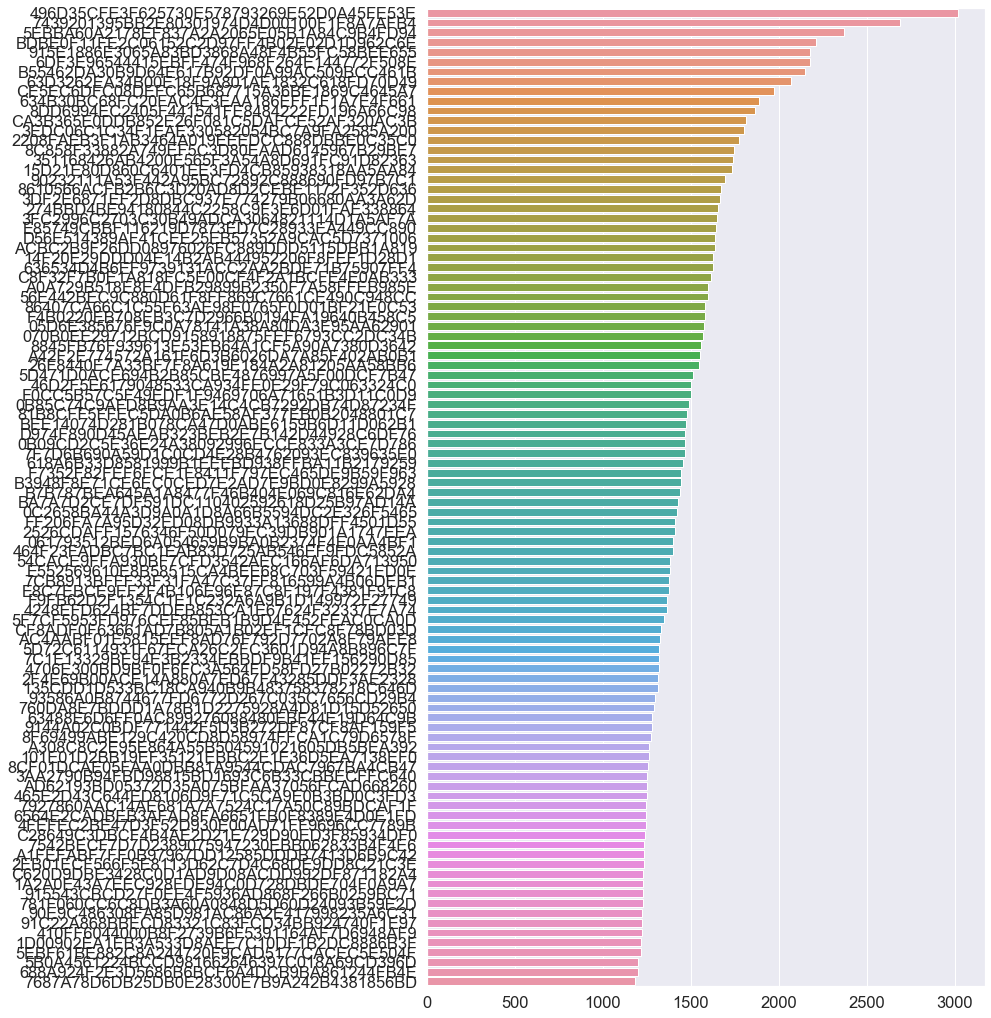

In [38]:
count = bookings["user_id"].value_counts()[:100,]
plt.figure(figsize=(10,18))
sns.barplot(count.values, count.index)
plt.show()

In [39]:
users = bookings.groupby("user_id").size().reset_index(name="bookings_count")
users.sort_values(by="bookings_count", ascending=False)
one_time_users = users[users.bookings_count <= 1]
returning_users = users[users.bookings_count > 1]

In [40]:
users.describe()

,bookings_count
count,256724.000000
mean,31.458972
std,76.006179
min,1.000000
25%,3.000000
50%,8.000000
75%,28.000000
max,3019.000000


Anzahl Buchungen der "wiederkehrenden" Nutzer (mehr als eine Buchung).

In [41]:
returning_users.describe()

,bookings_count
count,229290.000000
mean,35.103315
std,79.648318
min,2.000000
25%,4.000000
50%,11.000000
75%,33.000000
max,3019.000000


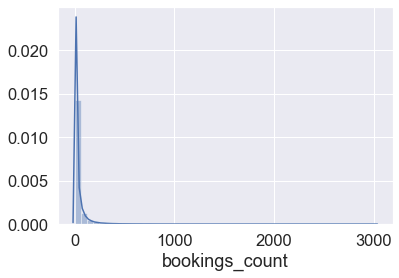

In [42]:
sns.distplot(returning_users.bookings_count)

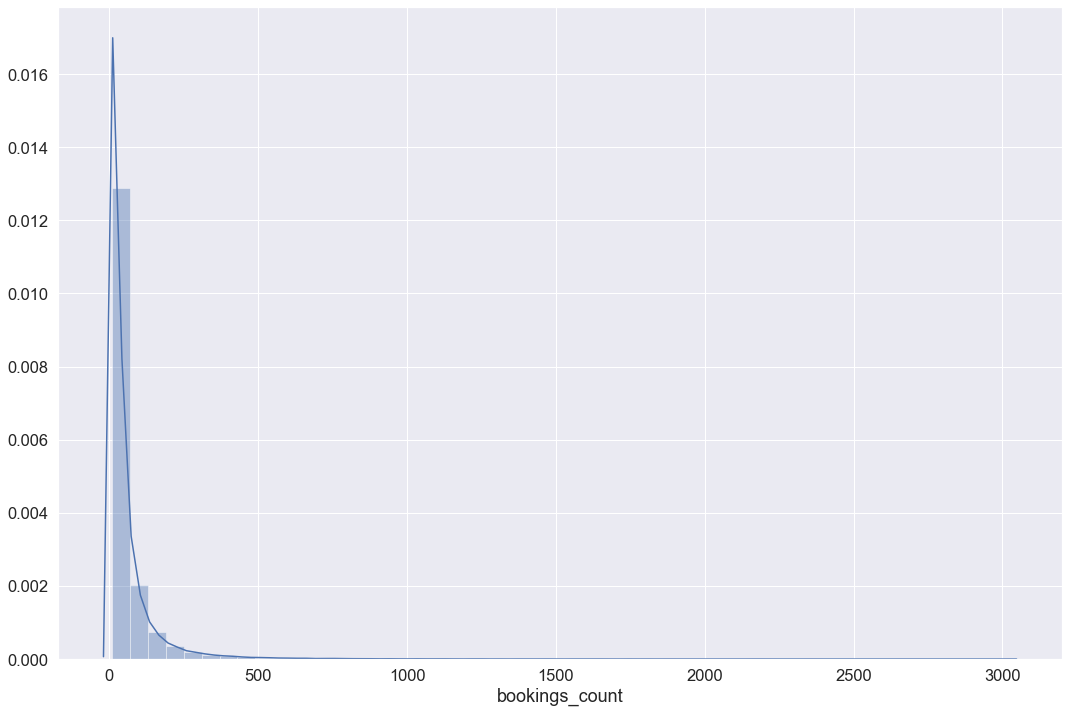

,bookings_count
count,127460.000000
mean,59.938326
std,100.101254
min,9.000000
25%,15.000000
50%,28.000000
75%,63.000000
max,3019.000000


In [43]:
x = users[users.bookings_count >= 9]
plt.figure(figsize=(18,12))
sns.distplot(x.bookings_count)
plt.show()

x.describe()

# Beliebtheit von Stationen

In [44]:
from_station_count = bookings["from_station_name"].value_counts()
to_station_count = bookings["to_station_name"].value_counts()

stations_data["from_count"] = stations_data["station_name"].map(from_station_count)
stations_data["to_count"] = stations_data["station_name"].map(to_station_count)

stations_data

,station_name,latitude,longitude,mean_q3_duration_in_min,from_count,to_count
0,Landungsbrücke/Hafentor,53.545700,9.972300,11.0,116211,117815
1,Fischmarkt/Breite Straße,53.546200,9.950880,11.0,61586,59422
2,Paulinenplatz/Wohlwillstraße,53.554200,9.962460,11.0,110145,109620
3,Burgstraße/Hammer Landstraße,53.555693,10.041298,11.0,82472,81075
4,Innocentiapark/Oberstraße,53.577248,9.982110,11.0,23825,21978
...,...,...,...,...,...,...
203,Osterstraße/Heußweg,53.575983,9.952071,10.0,7299,6932
204,Bahrenfelder Chaussee/Von-Sauer-Straße,53.565973,9.910870,14.0,3436,3127
205,Sieldeich/ Gresham Carat Hotel,53.528309,10.021814,14.0,99,83
206,Grindelberg / Bezirksamt Eimsbüttel,53.575408,9.977824,11.0,32259,30242


## Ausleihen

An diesen 25 Stationen wurden am häufigsten Stadträder ausgeliehen.

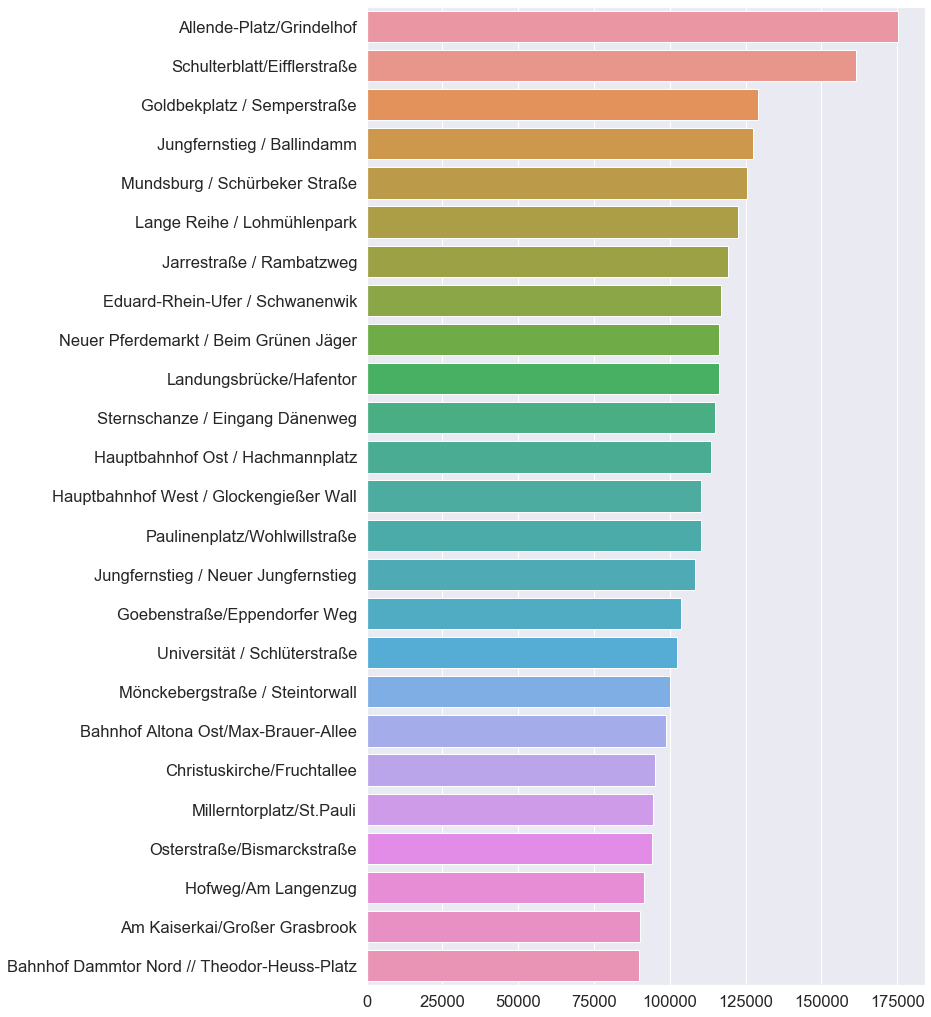

In [45]:
count = bookings["from_station_name"].value_counts()[:25,]
plt.figure(figsize=(10,18))
sns.barplot(count.values, count.index)
plt.show()

### Darstellung als Heatmap

In [53]:
from_count_map = KeplerGl(height=600)
from_count_map.add_data(data=stations_data, name="Ausleihen")
with open("config/from_stations.json", "r") as file:
    from_count_map.config = json.load(file)
from_count_map

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'c4w72y', 'type': '…

In [52]:
# Aktuelle Konfiguration der Map speichern
with open("config/from_stations.json", "w") as file:
    json.dump(from_count_map.config, file, indent=2)

## Rückgaben

An diesen 25 Stationen wurden am häufigsten Buchungen beendet.

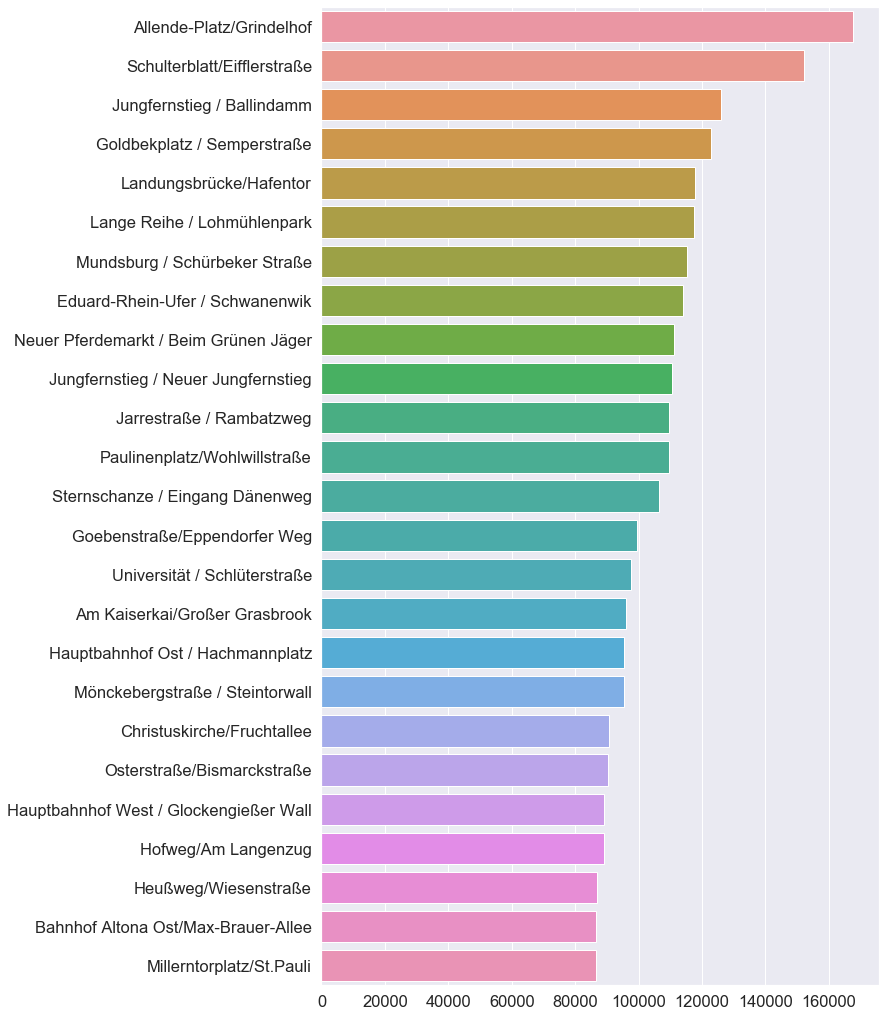

In [48]:
count = bookings["to_station_name"].value_counts()[:25,]
plt.figure(figsize=(10,18))
sns.barplot(count.values, count.index)
plt.show()

### Darstellung als Heatmap

In [49]:
to_count_map = KeplerGl(height=600)
to_count_map.add_data(data=stations_data, name="Rückgabe")
with open("config/to_stations.json", "r") as file:
    to_count_map.config = json.load(file)
to_count_map

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'fi8nzkh', 'type': …

In [50]:
# Aktuelle Konfiguration der Map speichern
with open("config/to_stations.json", "w") as file:
    json.dump(to_count_map.config, file, indent=2)